# Cleaning data

**Must run `cleaning_review_v1.ipynb` first**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("archive/cleaned_steam_db_v1.csv")

df

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,type,name,steam_appid,required_age,is_free,genres,platform_windows,...,lang_ko,lang_it,lang_ru,lang_ar,tool,nsfw,film,developers,publishers,short_description
0,0,0,0,demo,Pin Them Demo,1904630.0,0,True,[],True,...,False,False,False,False,False,False,False,[0],[0],NaN
1,1,1,1,game,Al-Qadim: The Genie's Curse,1904640.0,0,False,"[1, 3]",True,...,False,False,False,False,False,False,False,[1],[2],Experience the mysterious Al-Qadim game world ...
2,2,2,2,game,Dungeons & Dragons - Stronghold: Kingdom Simul...,1904650.0,0,False,"[28, 2]",True,...,False,False,False,False,False,False,False,[3],[2],Run your own kingdom in the legendary Dungeons...
3,3,3,3,game,Chapel 3-D: The Ascent,1904680.0,0,False,"[1, 23]",True,...,False,False,False,False,False,False,False,[4],[5],"Chapel 3-D: The Ascent is a break-neck, viole..."
4,4,4,4,game,VTuber Gallery : Anime Pose,1904690.0,0,True,"[51, 53, 55, 57, 59, 70]",True,...,False,False,False,False,True,False,False,[6],[6],VTuber Gallery is #1 anime pose app that allow...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115965,115965,115965,115965,video,The Chair,966800.0,13,False,[80],True,...,False,False,False,False,False,False,True,[51418],[51418],Richard Sullivan has spent ten years on death ...
115966,115966,115966,115966,video,Head,966810.0,13,False,[80],True,...,False,False,False,False,False,False,True,"[51418, 52947]",[51418],A group of 20-something puppets go on a weeken...
115967,115967,115967,115967,video,The Barn,966820.0,13,False,[80],True,...,False,False,False,False,False,False,True,"[51418, 52948]",[51418],Halloween 1989. Sam and Josh are enjoying what...
115968,115968,115968,115968,video,Be My Cat: A Film for Anne,966830.0,13,False,[80],True,...,False,False,False,False,False,False,True,[51418],[51418],Obsessed with convincing Hollywood actress Ann...


In [4]:
df = df.loc[:, ~df.columns.str.contains("^Unnamed")]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115970 entries, 0 to 115969
Data columns (total 42 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   type                115970 non-null  object 
 1   name                115956 non-null  object 
 2   steam_appid         115970 non-null  float64
 3   required_age        115970 non-null  int64  
 4   is_free             115970 non-null  bool   
 5   genres              115970 non-null  object 
 6   platform_windows    115970 non-null  bool   
 7   platform_mac        115970 non-null  bool   
 8   platform_linux      115970 non-null  bool   
 9   storage_mb          87119 non-null   float64
 10  memory_mb           87338 non-null   float64
 11  release_year        103399 non-null  float64
 12  release_quarter     101681 non-null  float64
 13  coming_soon         115970 non-null  bool   
 14  package_number      115970 non-null  int64  
 15  currency            73018 non-null

## Type, Name, App ID

___

In [5]:
df["steam_appid"] = df["steam_appid"].astype(int).astype(str)

In [6]:
# Check duplicated apps / apps with the same IDs
df["steam_appid"].duplicated().sum()

20937

Let's drop duplicated IDs

In [7]:
print("Original shape:                              {}".format(df.shape))
print("EXPECTED shape after dropping duplicates:    {}".format(df.drop_duplicates(subset="steam_appid").shape))
print("Dropping duplicates by comparing WHOLE rows: {}".format(df.drop_duplicates().shape))

Original shape:                              (115970, 42)
EXPECTED shape after dropping duplicates:    (95033, 42)
Dropping duplicates by comparing WHOLE rows: (95059, 42)


Most of the duplicated rows are the same, but some aren't. Let's see what's wrong with these.

In [8]:
# Drop duplicates by WHOLE rows first
df.drop_duplicates(inplace=True)
df.shape

(95059, 42)

In [9]:
# Select duplicated apps that haven't been removed by this way
except_appid = df.loc[df["steam_appid"].duplicated(), "steam_appid"].unique()

df.loc[df["steam_appid"].isin(except_appid[:3]), df.columns[1:24]]

,name,steam_appid,required_age,is_free,genres,platform_windows,platform_mac,platform_linux,storage_mb,memory_mb,...,package_number,currency,initial_price,final_price,discount_percent,developers_amount,publishers_amount,single,multi,support_vr
46325,Call of Duty®: Black Ops III,311210,18,False,"[1, 25]",True,True,False,102400.0,6144.0,...,3,NaN,NaN,NaN,NaN,2,2,True,True,False
48278,Ys I & II Chronicles+,223810,0,False,"[1, 25, 3]",True,False,False,NaN,NaN,...,1,CAD,1699.0,1699.0,0.0,1,1,True,False,False
48281,Ys I & II Chronicles+,223810,0,False,"[1, 25, 3]",True,False,False,NaN,NaN,...,1,VND,16500000.0,16500000.0,0.0,1,1,True,False,False
49172,Call of Duty®: Black Ops II,202970,18,False,[1],True,False,False,NaN,2048.0,...,2,JPY,804000.0,804000.0,0.0,1,1,True,True,False
49173,Call of Duty®: Black Ops II,202970,18,False,[1],True,False,False,NaN,2048.0,...,4,NaN,NaN,NaN,NaN,1,1,True,True,False
52022,Call of Duty®: Black Ops III,311210,17,False,"[1, 25]",True,True,False,NaN,NaN,...,3,MXN,129900.0,129900.0,0.0,2,2,True,True,False


Some have different currencies. Some have filled values and some don't.

In [10]:
# We are going to fill empty values by merging all the duplicates.
# If there is empty cell, fill it with other value of the same feature.
# Too avoid pushing error values, check if the row where:
#  -  only the curerncy is empty, OR
#  -  only the price is empty
# If there is none, we can ignore this.
df[(df["currency"].isna()) ^ (df["initial_price"].isna())]

,type,name,steam_appid,required_age,is_free,genres,platform_windows,platform_mac,platform_linux,storage_mb,...,lang_ko,lang_it,lang_ru,lang_ar,tool,nsfw,film,developers,publishers,short_description


In [11]:
kept_rows = []

for appid in except_appid:

	# Get smaller table with only duplicated 
	extracted_app_table = df.loc[df["steam_appid"] == appid]

	# Get the first row and merge gradually
	first_row = extracted_app_table.iloc[0, :]
	for i, row in extracted_app_table.iterrows():
		for j in range(len(row)):
			if pd.isna(first_row[j]):
				first_row[j] = row[j]

	# Finally, append this new item
	kept_rows.append(first_row)

kept_rows = pd.DataFrame(kept_rows)
kept_rows.head()

,type,name,steam_appid,required_age,is_free,genres,platform_windows,platform_mac,platform_linux,storage_mb,...,lang_ko,lang_it,lang_ru,lang_ar,tool,nsfw,film,developers,publishers,short_description
48278,game,Ys I & II Chronicles+,223810,0,False,"[1, 25, 3]",True,False,False,NaN,...,False,False,False,False,False,False,False,[4489],[2605],"Long, long ago, there was an ancient kingdom c..."
49172,game,Call of Duty®: Black Ops II,202970,18,False,[1],True,False,False,NaN,...,False,True,False,False,False,False,False,[3300],[2012],Pushing the boundaries of what fans have come ...
46325,game,Call of Duty®: Black Ops III,311210,18,False,"[1, 25]",True,True,False,102400.0,...,False,True,True,False,False,False,False,"[3300, 5104]","[2012, 5104]",Call of Duty: Black Ops III Zombies Chronicles...
57053,game,Monkey Island™ 2 Special Edition: LeChuck’s Re...,32460,0,False,[25],True,False,False,NaN,...,False,True,False,False,False,False,False,[33084],"[33084, 33085, 17407]","Wannabe pirate Guybrush Threepwood, and the no..."
57358,game,Crysis Warhead®,17330,0,False,[1],True,False,False,NaN,...,False,True,True,False,False,False,False,[1180],[46],Pulse-racing new installment from 2007's PC Ga...


In [12]:
print("Number of empty values by dropping duplicates by app IDs")
print(" -  Without the method above: {}".format(
	df.drop_duplicates(subset="steam_appid")	\
		[df["steam_appid"].isin(except_appid)].isna().sum()	\
											  .sum()
))
print(" -  With the method above:    {}".format(kept_rows.isna().sum().sum()))

Number of empty values by dropping duplicates by app IDs
 -  Without the method above: 27
 -  With the method above:    9


In [13]:
# Drop all duplicate rows and them push the new ones later
# with keep=False
df.drop_duplicates(subset="steam_appid", keep=False, inplace=True)
df = pd.concat([df, kept_rows], axis=0)
print("Number of duplicated rows: {}".format(df["steam_appid"].duplicated().sum()))
print(f"Dataframe shape: {df.shape}")

Number of duplicated rows: 0
Dataframe shape: (95033, 42)


## Description

___

In [14]:
df.rename(columns={"short_description": "description"}, inplace=True)
df["description"].fillna("", inplace=True)
df["description"].to_list()[:5]

['',
 'Experience the mysterious Al-Qadim game world and prepare for arcade-style combat and role-playing genre - all in the style of Arabian Nights! Diverging from the Gold Box formula, Al-Qadim allows you to experience the immersion and thrill of an AD;D adventure with a condensed role-playing system.',
 'Run your own kingdom in the legendary Dungeons ; Dragons game world. In this remarkable kingdom simulator, your goal is to become Emperor by building and expanding your stronghold in competition against opposing computer-controlled kingdoms.',
 ' Chapel 3-D: The Ascent is a break-neck, violent boomer shooter inspired by classics of the genre. Experience the story behind the events of Cathedral 3-D and make your enemies regret ever crossing your path. Become a beast and let loose. ',
 'VTuber Gallery is #1 anime pose app that allows you to make easy pose quickly. Here you can use lots of VTuber avatars or your VRM models. You can use it as anime pose reference, vtuber pose posters or

## Release date

___

In [15]:
df["release_year"].min(), df["release_year"].max()

(1969.0, 2177.0)

Some apps are very old. Some apps will be released in the future. However, there are some weird dates.

In [16]:
df.loc[(df["release_year"] < 1990) | (df["release_year"] > 2030)]

,type,name,steam_appid,required_age,is_free,genres,platform_windows,platform_mac,platform_linux,storage_mb,...,lang_ko,lang_it,lang_ru,lang_ar,tool,nsfw,film,developers,publishers,description
2453,game,World of Yggdrasil,2112370,0,False,"[1, 25, 29, 3, 2]",True,False,False,102400.0,...,False,False,False,False,False,False,False,[1241],[1241],"Become emperor, criminal or merchant in the wo..."
22700,game,Japanese MILF,2679350,0,False,"[1, 25, 4, 28]",True,False,False,10240.0,...,False,False,False,False,False,False,False,[17811],[17811],Japanese MILF is a game for adults created on ...
32217,game,NFT Simulator,1910990,0,False,"[4, 28, 2]",True,False,False,350.0,...,False,False,False,False,False,False,False,[9730],[9730],"Have fun creating, selling, and trading NFTs w..."
56235,game,Project Worth: Forgather,1990330,0,False,"[1, 25, 23, 3]",True,False,False,2048.0,...,False,False,False,False,False,False,False,[36113],[36113],Who will you be when they arrive? Forgather is...
69241,game,Dr Dick Dong: Stripper Underworld,1217950,0,False,"[1, 25, 4, 23, 3]",True,False,False,5120.0,...,False,False,False,False,False,False,False,[41057],[41058],"NSFW: Dong, Dick Dong is the name and secret a..."
69923,game,VR Hentai Lesbians SEX,1614840,0,False,"[1, 25, 23]",True,False,False,2500.0,...,True,False,True,False,False,False,False,[41396],[41396],Japanese lesbians and you among them. Enter vi...
70851,game,My Otaku Academia,1681720,0,True,"[4, 37, 23]",True,False,False,500.0,...,False,False,False,False,False,False,False,[41867],[41867],A Fan made game of 9 Anitube all stars and a m...
95046,game,Smuggle Buddies,1017770,0,False,[23],True,True,True,256.0,...,False,False,False,False,False,False,False,[],[21],The development of this game has been cancelled


Some of these are NSFW but without NSFW tags. Some are no longer available on Steam. ~~It's better to remove some of them.~~ Since we need to use `cleaned_bridge.csv`, we won't drop anything.

In [17]:
#df = df[~df["steam_appid"].isin(["2679350", "1910990", "1217950", "1614840", "1017770"])]

In [18]:
# Get current date (according the the most recent released app)
temp = df.loc[~df["coming_soon"], ["release_year", "release_quarter"]].drop_duplicates().sort_values(
				by=["release_year", "release_quarter"], ascending=False).head(1)

curr_year, curr_quarter = temp.iloc[0, :]
curr_year, curr_quarter

(2024.0, 2.0)

In [19]:
# Check validation
#  -  If the app has been already released:
#      -  If the release date is older or similar to the current date, it's valid, otherwise not.
def is_before_curr(x_year, x_quarter):
	global curr_year, curr_quarter

	if pd.isna(x_year):
		return False
	
	if x_year < curr_year:
		return True
	elif (x_year == curr_year) and (x_quarter <= curr_quarter):
		return True
	return False


df.loc[df["coming_soon"] & ~df.apply(lambda x: is_before_curr(x["release_year"], x["release_quarter"]), axis=1),
	   ["coming_soon", "release_year", "release_quarter"]]	\
	   .sort_values(by=["release_year", "release_quarter"]).drop_duplicates()

,coming_soon,release_year,release_quarter
668,True,2024.0,3.0
841,True,2024.0,4.0
14,True,2024.0,NaN
2161,True,2025.0,1.0
3803,True,2025.0,2.0
1726,True,2025.0,3.0
736,True,2025.0,4.0
120,True,2025.0,NaN
415,True,2026.0,1.0
3217,True,2026.0,2.0


The values are valid. It's time to simplify it.

<Axes: xlabel='release_distance_value', ylabel='count'>

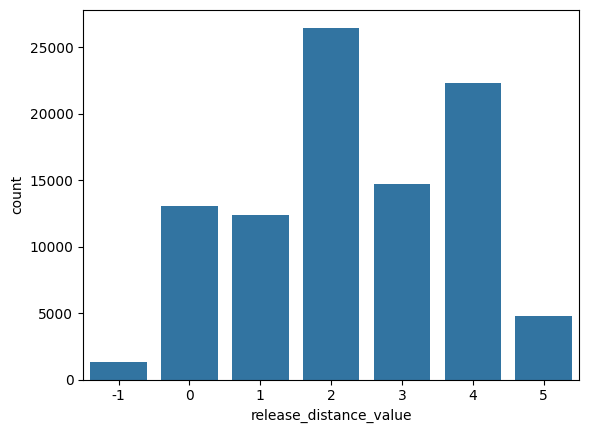

In [20]:
def get_date_encoding(release_year, release_quarter, coming_soon):
	global curr_year, curr_quarter
	
	if coming_soon:
		return 0			# In the future: coming soon
	
	if pd.isna(release_year):
		return -1
	
	quarter_distance = (curr_year - release_year) * 4 + (curr_quarter - release_quarter)
	if quarter_distance < 0:
		raise Exception(release_year, release_quarter, coming_soon)
	elif quarter_distance < 4:		# 1 year
		return 1
	elif quarter_distance < 12:		# 3 years
		return 2
	elif quarter_distance < 20:		# 5 years
		return 3
	elif quarter_distance < 40:		# 10 years
		return 4
	else:
		return 5

df["release_distance_value"] = df[["release_year", "release_quarter", "coming_soon"]].apply(
 	lambda x: get_date_encoding(x["release_year"], x["release_quarter"], x["coming_soon"]), axis=1)

sns.countplot(df, x="release_distance_value")

## Currency

___

In [21]:
df["currency"].unique()

array([nan, 'VND', 'RUB', 'JPY', 'UYU', 'USD', 'KRW', 'CAD', 'PHP', 'EUR',
       'GBP', 'CNY', 'MYR', 'CHF', 'PLN', 'NZD', 'BRL', 'AUD', 'COP',
       'IDR', 'UAH', 'TWD', 'SAR', 'KZT', 'CLP', 'HKD', 'ILS', 'THB',
       'INR', 'SGD', 'MXN'], dtype=object)

In [22]:
df["initial_price"] /= 100
df["final_price"] /= 100

In [23]:
currency_map = {
	"VND": 0.00004005,	"RUB": 0.010932,	"JPY": 0.006614,	"UYU": 0.026613,
	"USD": 1.00000000,	"KRW": 0.000743,	"CAD": 0.738347,	"PHP": 0.017813,
	"EUR": 1.079713,	"GBP": 1.263593,	"CNY": 0.138508,	"MYR": 0.211665,
	"CHF": 1.109108,	"PLN": 0.251197,	"NZD": 0.598600,	"BRL": 0.199382,
	"AUD": 0.652695,	"COP": 0.000258,	"IDR": 0.000063,	"UAH": 0.025478,
	"TWD": 0.031289,	"SAR": 0.266666,	"KZT": 0.002236,	"CLP": 0.001019,
	"HKD": 0.127774,	"ILS": 0.271195,	"THB": 0.027524,	"INR": 0.012002,
	"SGD": 0.741905,	"MXN": 0.060350
}

def to_usd(value, currency):
	global currency_map
	if pd.isna(value):
		return 0.0
	return value * currency_map[currency]

df["initial_price_usd"] = df.apply(lambda x: to_usd(x["initial_price"], x["currency"]), axis=1)
df["final_price_usd"] = df.apply(lambda x: to_usd(x["final_price"], x["currency"]), axis=1)

In [24]:
df["initial_price_usd"].min(), df["initial_price_usd"].max()

(0.0, 199.99)

In [25]:
df["discount_percent"].fillna(0.0, inplace=True)

In [26]:
df.drop(columns=["currency", "initial_price", "final_price"], inplace=True)

## (Partly) Null treatment

___

In [27]:
# See again the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95033 entries, 0 to 58548
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   type                    95033 non-null  object 
 1   name                    95021 non-null  object 
 2   steam_appid             95033 non-null  object 
 3   required_age            95033 non-null  int64  
 4   is_free                 95033 non-null  bool   
 5   genres                  95033 non-null  object 
 6   platform_windows        95033 non-null  bool   
 7   platform_mac            95033 non-null  bool   
 8   platform_linux          95033 non-null  bool   
 9   storage_mb              70170 non-null  float64
 10  memory_mb               70474 non-null  float64
 11  release_year            84290 non-null  float64
 12  release_quarter         82811 non-null  float64
 13  coming_soon             95033 non-null  bool   
 14  package_number          95033 non-null  int

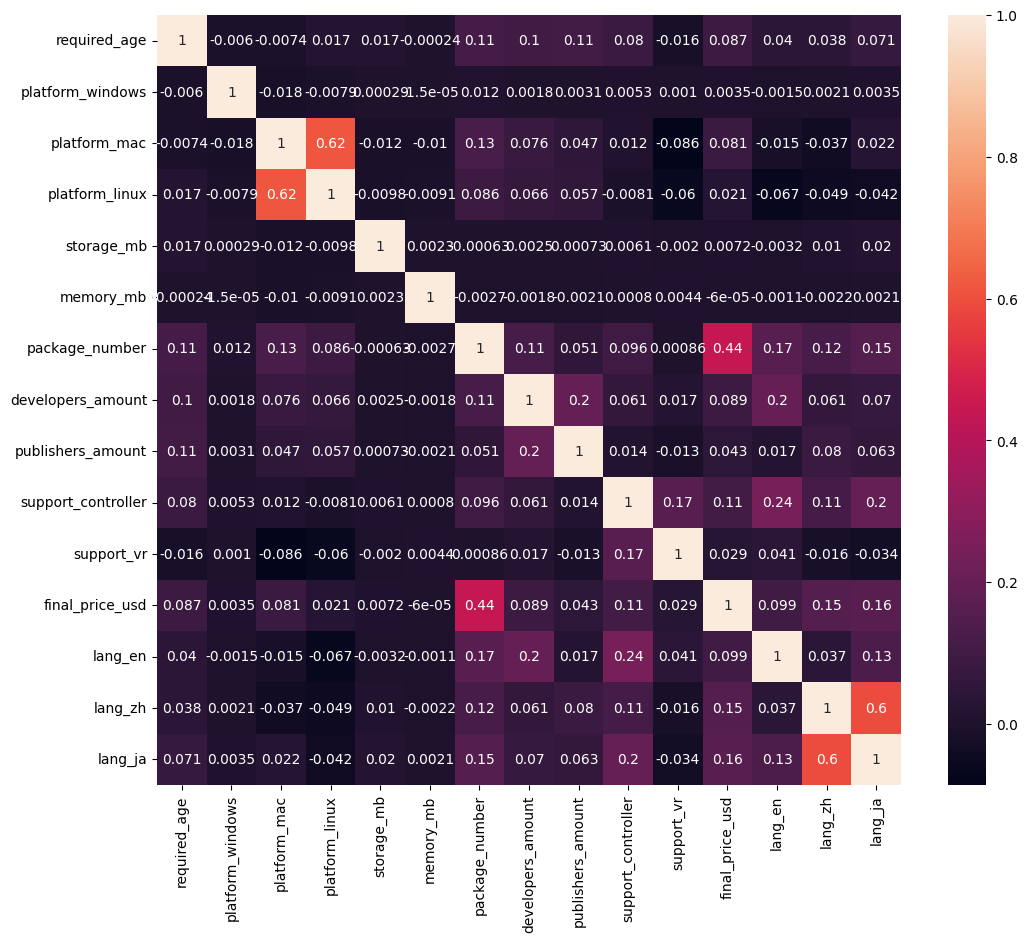

In [28]:
fig, ax = plt.subplots(figsize=(12, 10))

sns.heatmap(df[["required_age", "platform_windows", "platform_mac", "platform_linux",
				"storage_mb", "memory_mb", "package_number", "developers_amount", "publishers_amount",
				"support_controller", "support_vr", "final_price_usd", "lang_en", "lang_zh", "lang_ja"]].corr(), annot=True, ax=ax)

plt.show()

In [29]:
df.loc[(df["developers_amount"] == 0), "name"].to_list()[:10]

['Restaurant Renovator Playtest',
 'Barista: Rise and Grind Playtest',
 'Blackjack Avenue Playtest',
 'Islets Playtest',
 'Snow Plow Playtest',
 'Hunter Project: Operation Survive Playtest',
 '虚拟主播模拟器 Playtest',
 'Home VR Playtest',
 'Orbit.Industries Playtest',
 'Tactical Squad – SWAT Stories Playtest']

Some apps don't have developers. In fact, there are developers and they perhaps are the developers of Valve and they won't show any information about them.

**But the next challenge is difficult.**

In [30]:
df["memory_mb"].isna().sum(), df["storage_mb"].isna().sum()

(24559, 24863)

In [31]:
# We can rely on VR supports to fill 
# https://www.meta.com/help/quest/articles/headsets-and-accessories/oculus-rift-s/rift-s-minimum-requirements/?utm_source=www.reddit.com&utm_medium=oculusredirect#faq_248749509016567
df.loc[df["support_vr"] & df["memory_mb"].notna(), ["steam_appid", "name", "memory_mb"]].sort_values(by=["memory_mb"])

,steam_appid,name,memory_mb
47682,367320,Albino Lullaby Demo,2.0
45500,507130,Gnomes Vs. Fairies Demo,2.0
40650,1788300,Robotics in VR (demo) Demo,2.0
32879,1312400,Tactical Warfare Simulator Demo,2.0
63541,444910,Void 21 Demo,2.0
...,...,...,...
68329,1232920,Parliament - Parlement,32768.0
44851,516470,CRAPPY ZOMBIE GAME,32768.0
39192,1806670,Haunted House Escape: A VR Experience,32768.0
86122,2416150,Zombie Ants VR,65536.0


In [32]:
# Replace weird values
df.loc[df["support_vr"], "memory_mb"] = df.loc[df["support_vr"], "memory_mb"].apply(lambda x: max(512, x) if pd.notna(x) else None)

# Get average memory storage
memory_mb_avg = df.loc[df["support_vr"] & df["memory_mb"].notna(), "memory_mb"].mean()
memory_mb_avg

6483.637905820416

In [33]:
memory_mb_avg = 2 * 1024
# Fill nulls
df.loc[df["support_vr"] & df["memory_mb"].isna(), "memory_mb"] = memory_mb_avg
df["memory_mb"].isna().sum()

24085

In [34]:
# Also we can rely on number of packages
df.loc[df["package_number"] >= 4, ["package_number", "memory_mb"]].drop_duplicates()

,package_number,memory_mb
89,4,4096.0
1902,8,8192.0
4886,13,3072.0
6652,7,8192.0
9923,4,8192.0
27097,4,NaN
29997,4,6144.0
31148,4,8.0
31834,5,8192.0
43263,6,NaN


In [35]:
df.loc[(df["package_number"] >= 4) & (df["memory_mb"] < 512), ["type", "name", "steam_appid", "package_number", "memory_mb"]]

,type,name,steam_appid,package_number,memory_mb
31148,dlc,RAGE 2 - RAGE Coins,1067980,4,8.0
42956,dlc,Insurgency: Sandstorm - Woodland Weapon Skin Set,1763082,4,8.0
45850,dlc,HELLDIVERS™ - Support Pack,395233,4,4.0


Since they are DLC, we wouldn't change memory in this case.

In [36]:
# Replace weird values
memory_mb_avg = df.loc[(df["package_number"] >= 4) & df["memory_mb"].notna(), "memory_mb"].mean()
memory_mb_avg

4490.017094017094

In [37]:
df.loc[(df["package_number"] >= 4) & df["memory_mb"].isna(), "memory_mb"] = 2048
df["memory_mb"].isna().sum()

24062

## Outlier treatment

___

In [38]:
count = 0
for val in df["memory_mb"].apply(lambda x: (round(x / 512) / 2) if pd.notna(x) else None).sort_values().unique():
    count += 1
    print(val, end="\n" if count % 5 == 0 else "\t\t")

0.0		0.5		1.0		1.5		2.0
2.5		3.0		4.0		4.5		5.0
6.0		7.0		8.0		8.5		9.0
10.0		11.0		11.5		12.0		13.0
15.0		15.5		16.0		16.5		17.0
22.0		24.0		25.0		30.0		32.0
33.0		40.0		41.0		64.0		69.0
88.0		128.0		228.0		460.0		500.0
512.0		768.0		1000.0		1024.0		2048.0
4000.0		4096.0		8999.0		19942.0		nan


In [39]:
def get_range_with_iqr(series):
	p_025 = np.percentile(series, 25)
	p_075 = np.percentile(series, 75)
	iqr = p_075 - p_025
	upper_range = p_075 + 1.5 * iqr
	lower_range = p_025 - 1.5 * iqr
	return lower_range, upper_range

def get_range_with_percentile(series):
	lower_range = np.percentile(series, 1)
	upper_range = np.percentile(series, 99)
	return lower_range, upper_range

In [40]:
df["memory_gb"] = df["memory_mb"].apply(lambda x: (round(x / 512) / 2) if pd.notna(x) else None)
print("Range of IQR: {}".format( get_range_with_iqr(df["memory_gb"].dropna()) ))
print("Range of percentile 0.01 & 0.99: {}".format( get_range_with_percentile(df["memory_gb"].dropna()) ))

Range of IQR: (-3.5, 8.5)
Range of percentile 0.01 & 0.99: (0.0, 16.0)


(1198, 43)


<Axes: xlabel='memory_gb', ylabel='Count'>

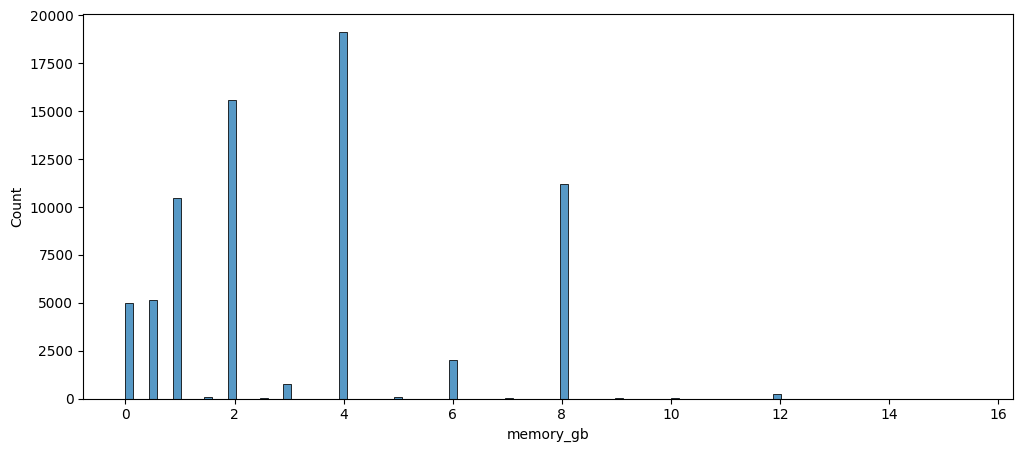

In [41]:
lower, upper = get_range_with_percentile(df["memory_gb"].dropna())
print(df[df["memory_gb"] >= upper].shape)

plt.figure(figsize=(12, 5))
sns.histplot(df[df["memory_gb"] < upper], x="memory_gb")

Push right outliers to the left. In this case, 16GB will be a appropriate number.

In [42]:
df.loc[df["memory_gb"] > 16, "memory_gb"] = 16

Modify `storage` as well

In [43]:
df["storage_gb"] = df["storage_mb"].apply(lambda x: (round(x / 256) / 4) if pd.notna(x) else None)
print("Range of IQR: {}".format( get_range_with_iqr(df["storage_gb"].dropna()) ))
print("Range of percentile 0.01 & 0.99: {}".format( get_range_with_percentile(df["storage_gb"].dropna()) ))

Range of IQR: (-5.375, 9.625)
Range of percentile 0.01 & 0.99: (0.0, 52.0)


Outliers shape: (744, 44)


<Axes: xlabel='storage_gb', ylabel='Count'>

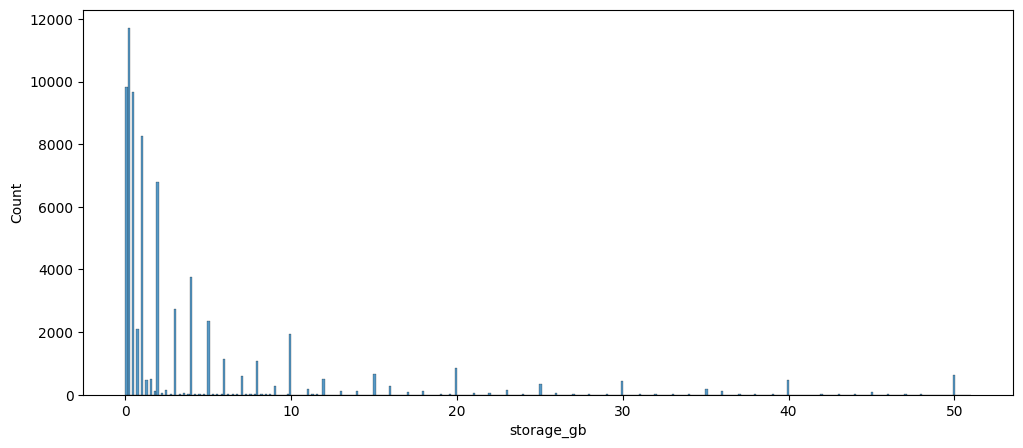

In [44]:
lower, upper = get_range_with_percentile(df["storage_gb"].dropna())
print("Outliers shape: {}".format(df[df["storage_gb"] >= upper].shape))

plt.figure(figsize=(12, 5))
sns.histplot(df[df["storage_gb"] < upper], x="storage_gb")

In [45]:
df.loc[df["storage_gb"] > 80, ["name", "steam_appid", "storage_gb"]].sort_values(by=["storage_gb"], ascending=False).head(20)

,name,steam_appid,storage_gb
78639,godfuck | ゴッドファック,1331900,44444.0
87756,Haunt or Heist,2539870,10000.0
76875,PROTEST SIMULATOR,1131650,9000.0
15769,Midnight Cruise,2842120,5000.0
16765,Paramorfosi,2628950,5000.0
12530,My Slow Life with the Princess Knight and Her ...,1934900,4000.0
77786,Lock 'n Load Tactical Digital: Heroes of Norma...,1247620,3072.0
21544,Forgotten Knight,2688610,2048.0
92115,my MusicOasis,1750240,2000.0
93379,RUSSI.A SIMULATOR,893950,1984.0


In [46]:
df.loc[df["storage_gb"] > 60, "storage_gb"] = 60

In [47]:
df["memory_gb"].max(), df["storage_gb"].max()

(16.0, 60.0)

In [48]:
df.drop(columns=["storage_mb", "memory_mb"], inplace=True)

## Finish

___

In [49]:
name_appid_dict = {
    "1104360": "Ivanoile (Script Code)",
    "1090950": "Ivanoile (Dev Support Donation)",
    "1074060": "Annual Intruders",
    "1064981": "Divine D.I.V.A. (Script)",
    "1841430": "Xyz Crossing",
    "1837030": "三国志-策略版",
    "396420": "The Spookening",
    "495790": "Fasaria World Online - ELITE Sponsorship",
    "1219280": "Dark Tunnels",
    "1625780": "Don't freak out",
    "1475730": "Unity Chan And Cube World!!",
    "1718090": "Wizard Man"
}

In [50]:
df.loc[df["name"].isna(), "name"] = df.loc[df["name"].isna(), "steam_appid"].apply(lambda x: name_appid_dict[x])
df_game["description"].fillna("", inplace=True)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95033 entries, 0 to 58548
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   type                    95033 non-null  object 
 1   name                    95033 non-null  object 
 2   steam_appid             95033 non-null  object 
 3   required_age            95033 non-null  int64  
 4   is_free                 95033 non-null  bool   
 5   genres                  95033 non-null  object 
 6   platform_windows        95033 non-null  bool   
 7   platform_mac            95033 non-null  bool   
 8   platform_linux          95033 non-null  bool   
 9   release_year            84290 non-null  float64
 10  release_quarter         82811 non-null  float64
 11  coming_soon             95033 non-null  bool   
 12  package_number          95033 non-null  int64  
 13  discount_percent        95033 non-null  float64
 14  developers_amount       95033 non-null  int

In [53]:
df.to_csv("archive/cleaned_steam_db_v2.csv", index=False)